<a href="https://colab.research.google.com/github/lucianolcp/projetosbootcamp/blob/main/Projetos/Sprint_11_%C3%81lgebra_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statement

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina e você precisa avaliar a possibilidade de fazê-lo.

- Tarefa 1: Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- Tarefa 2: Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- Tarefa 3: Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- Tarefa 4: Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior. É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [ ]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carregar Dados

Carregue os dados e faça uma verificação básica de que estão livres de problemas óbvios.

In [ ]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renomeamos as colunas para tornar o código mais consistente com seu estilo.

In [ ]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [ ]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4095,1,20.0,38600.0,2,0
2773,1,24.0,26100.0,2,0
308,1,25.0,44600.0,1,0
4617,1,19.0,45400.0,0,0
1793,1,32.0,54400.0,0,0
4014,1,34.0,43800.0,3,0
320,0,36.0,40300.0,5,0
2520,1,21.0,46100.0,2,0
4901,1,41.0,56400.0,2,0
4597,1,40.0,43300.0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:
# Converter a coluna 'age' de float para int
df['age'] = df['age'].astype(int)

In [ ]:
# verifique se a conversão foi bem-sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [ ]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?

In [ ]:
# Exibir estatísticas descritivas
print(df.describe())

            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  


Os dados parecem não ter valores extremos ou fora do normal.

## AED

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

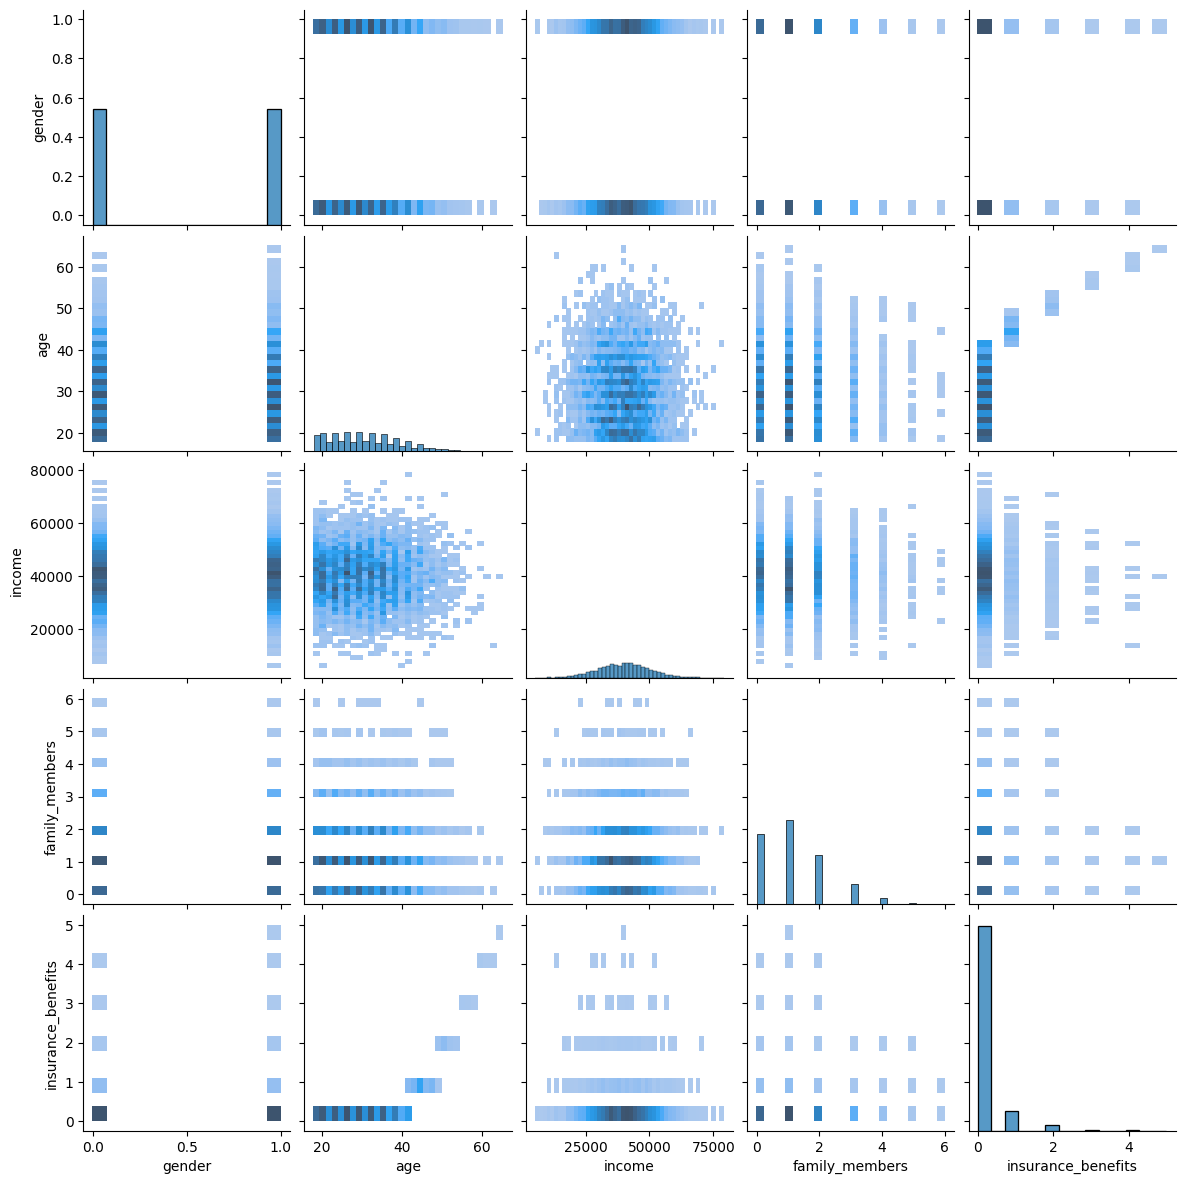

In [ ]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, é um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas). É aí que Álgebra Linear e Aprendizado de Máquina podem ser bastante úteis.

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.
Você pode querer rever as seguintes lições (capítulo -> lição)- Distância Entre Vetores -> Distância Euclidiana
- Distância Entre Vetores -> Distância de Manhattan

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

Escreva uma função que retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não deve ser levado em consideração para esta tarefa.

Você pode usar uma implementação pronta do algoritmo kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) ou usar a sua própria.
Teste-o para quatro combinações de dois casos
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distância
  - Euclidiana
  - Manhattan

Responda às perguntas:
- Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?
-Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?

In [ ]:
from sklearn.neighbors import NearestNeighbors

feature_names = ['gender', 'age', 'income', 'family_members']

In [ ]:
def get_knn(df, n, k, metric):
    """
    Retorna os k vizinhos mais próximos de um objeto n.

    :param df: DataFrame pandas usado para encontrar objetos semelhantes
    :param n: índice do objeto para o qual os vizinhos mais próximos são procurados
    :param k: número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância ('euclidean' ou 'manhattan')
    :return: DataFrame com os k vizinhos mais próximos e suas distâncias
    """
    # Obter os dados originais (não escalados)
    data = df[feature_names].to_numpy()

    # Configurar o algoritmo kNN
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(data)

    # Encontrar os vizinhos mais próximos
    nbrs_distances, nbrs_indices = nbrs.kneighbors([data[n]], return_distance=True)

    # Criar DataFrame com os resultados
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]],
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)

    return df_res


In [ ]:
# Índice do registro para o qual queremos encontrar vizinhos
n = 0
k = 5

# Usar dados não escalados, métrica Euclidiana
print("Dados não escalados, métrica Euclidiana:")
result_no_scale_euclidean = get_knn(df, n=n, k=k, metric='euclidean')
print(result_no_scale_euclidean)

# Usar dados não escalados, métrica Manhattan
print("\nDados não escalados, métrica Manhattan:")
result_no_scale_manhattan = get_knn(df, n=n, k=k, metric='manhattan')
print(result_no_scale_manhattan)


Dados não escalados, métrica Euclidiana:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625

Dados não escalados, métrica Manhattan:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0


Escalando os dados

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Escalar os dados
scaler = MaxAbsScaler()
df_scaled = df.copy()
df_scaled[feature_names] = scaler.fit_transform(df[feature_names])

In [ ]:
# Visualizar uma amostra dos dados escalados
print(df_scaled.sample(5))

      gender       age    income  family_members  insurance_benefits
2654     0.0  0.307692  0.465823        0.000000                   0
2882     1.0  0.569231  0.535443        0.166667                   0
4640     0.0  0.692308  0.382278        0.166667                   1
1274     0.0  0.553846  0.669620        0.500000                   0
766      1.0  0.446154  0.651899        0.833333                   0


In [ ]:
# Usar dados escalados, métrica Euclidiana
print("Dados escalados, métrica Euclidiana:")
result_scaled_euclidean = get_knn(df_scaled, n=n, k=k, metric='euclidean')
print(result_scaled_euclidean)

# Usar dados escalados, métrica Manhattan
print("\nDados escalados, métrica Manhattan:")
result_scaled_manhattan = get_knn(df_scaled, n=n, k=k, metric='manhattan')
print(result_scaled_manhattan)

Dados escalados, métrica Euclidiana:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754
4869     1.0  0.646154  0.637975        0.166667                   1  0.018418
3275     1.0  0.646154  0.651899        0.166667                   1  0.028550

Dados escalados, métrica Manhattan:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245
4869     1.0  0.646154  0.637975        0.166667                   1  0.025511
3365     1.0  0.630769  0.596203        0.166667         

Agora, vamos obter registros semelhantes para um determinado registro para cada combinação

Respostas para as perguntas

**Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?**

Sim, os dados não escalados podem afetar o algoritmo kNN, pois características com magnitudes maiores, como income, podem dominar o cálculo das distâncias. Isso pode levar a uma seleção de vizinhos que são mais semelhantes em termos dessa característica dominante, enquanto outras características são subvalorizadas.

**Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?**

A métrica de distância de Manhattan tende a ser menos sensível a outliers e variações extremas nas características. Os resultados usando a métrica de Manhattan podem ser mais consistentes entre os dados escalados e não escalados, especialmente se as características tiverem magnitudes semelhantes após o escalonamento.

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Em termos de aprendizado de máquina, podemos olhar para isso como uma tarefa de classificação binária.

Com os pagamentos de seguro sendo mais do que zero como objetivo, avalie se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

Instruções:
- Construa um classificador baseado em kNN e meça sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados. Seria interessante ver como k pode influenciar a métrica de avaliação e se a escalabilidade dos dados faz alguma diferença. Você pode usar uma implementação pronta do algoritmo de classificação kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ou usar a sua própria.
- Construa o modelo dummy, que é aleatório para este caso. Deve retornar com alguma probabilidade o valor "1". LVamos testar o modelo com quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como

$$
P\{\text{pagamento de seguro recebido}= número de clientes que receberam qualquer pagamento de seguro}}{\text{número total de clientes}}.
$$

Divida os dados inteiros na proporção 70:30 para as partes de treinamento/teste.

In [ ]:
# calcule a meta
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [ ]:
# verifique o desequilíbrio de classe com value_counts()

class_distribution = df['insurance_benefits_received'].value_counts(normalize=True)
print("Distribuição de classes:")
print(class_distribution)

Distribuição de classes:
0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [ ]:
# Características e alvo
feature_names = ['gender', 'age', 'income', 'family_members']
X = df[feature_names]
y = df['insurance_benefits_received']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

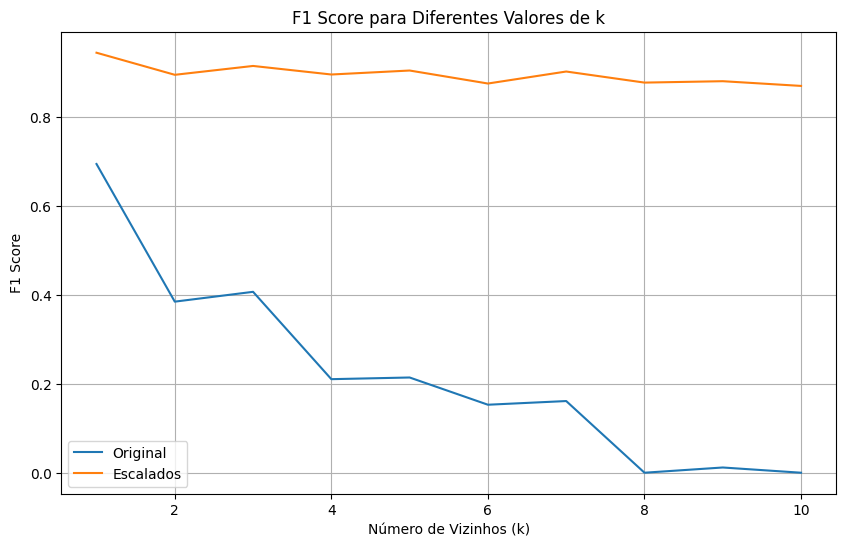

In [ ]:
# Avaliar o classificador kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Função para calcular o F1 score para diferentes valores de k
def evaluate_knn(X_train, X_test, y_train, y_test, k_range=range(1, 11)):
    f1_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    return f1_scores

# Avaliar kNN nos dados não escalados
f1_scores_original = evaluate_knn(X_train, X_test, y_train, y_test)

# Escalar os dados
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Avaliar kNN nos dados escalados
f1_scores_scaled = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), f1_scores_original, label='Original')
plt.plot(range(1, 11), f1_scores_scaled, label='Escalados')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score para Diferentes Valores de k')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def eval_classifier(y_true, y_pred):

    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')

# se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de Confusão')
    print(cm)

In [ ]:
# gerando saída de um modelo aleatório

def rnd_model_predict(P, size, seed=123):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [ ]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(y_test))

    eval_classifier(y_test, y_pred_rnd)
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[0.88733333 0.        ]
 [0.11266667 0.        ]]

A probabilidade: 0.11
F1: 0.12
Matriz de Confusão
[[0.78533333 0.102     ]
 [0.09866667 0.014     ]]

A probabilidade: 0.50
F1: 0.18
Matriz de Confusão
[[0.448      0.43933333]
 [0.05866667 0.054     ]]

A probabilidade: 1.00
F1: 0.20
Matriz de Confusão
[[0.         0.88733333]
 [0.         0.11266667]]



**Conclusões**

*Efeito da Escala nos Dados:*

A escalagem dos dados é crucial para o desempenho do modelo kNN. Sem escalagem, características com valores maiores tendem a dominar o cálculo de distância, afetando negativamente o desempenho.

*kNN vs Modelo Dummy:*

Mesmo o kNN simples com dados escalados supera o modelo dummy em termos de F1 score, indicando que ele consegue capturar padrões nos dados que o modelo dummy aleatório não consegue.

*Importância da Escolha de k:*

O valor de k influencia o desempenho do kNN, mas a diferença é menos pronunciada nos dados escalados, o que sugere que a escolha do valor de k deve ser acompanhada de uma boa pré-processamento dos dados.

# Tarefa 3. Regressão (com Regressão Linear)

Com os pagamentos de seguro como objetivo, avalie qual seria o REQM para um modelo de Regressão Linear.

Construa sua própria implementação de Regressão Linear. Para isso, lembre-se de como a solução da tarefa de regressão linear é formulada em termos de Álgebra linear. Verifique o REQM para os dados originais e os escalados. Você pode ver alguma diferença no REQM entre esses dois casos?

Vamos denotar
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como
$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar os $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e o último pode ser usado para calcular valores preditos

$$
\hat{y} = X_{val}w
$$

Divida todos os dados na proporção 70:30 para as partes de treinamento/validação. Use a métrica REQM para a avaliação do modelo.

In [ ]:
class MyLinearRegression:

    def __init__(self):

        self.weights = None

    def fit(self, X, y):

        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):

        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # calculando a previsão
        y_pred = X2 @ self.weights

        return y_pred

In [ ]:
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

In [ ]:
import math

In [ ]:
# Dados originais
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Escala os dados
scaler = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Divide os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_scaled_train, X_scaled_test, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

# Modelo com dados originais
print("Modelo com dados originais:")
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print("Pesos:", lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)
print()

# Modelo com dados escalados
print("Modelo com dados escalados:")
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_scaled_train, y_train)
print("Pesos:", lr_scaled.weights)

y_scaled_test_pred = lr_scaled.predict(X_scaled_test)
eval_regressor(y_test, y_scaled_test_pred)


Modelo com dados originais:
Pesos: [-9.14582870e-01  3.53803396e-02  1.20560585e-02 -4.16412924e-07
 -1.62446835e-02]
REQM: 0.35
R2: 0.65

Modelo com dados escalados:
Pesos: [ 0.15053259  0.29860875  0.00602802 -0.00412211 -0.01772746]
REQM: 0.35
R2: 0.65


Os resultados mostram que, para este caso, a escalagem dos dados não teve um impacto significativo no desempenho do modelo de regressão linear. Tanto o erro quadrático médio (REQM) quanto o coeficiente de determinação (R2) são idênticos para os modelos treinados com dados originais e escalados.

# Tarefa 4. Ofuscando dados

É melhor ofuscar os dados multiplicando as características numéricas (lembre-se, elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$.

$$
X' = X \times P
$$

Tente fazer isso e verifique como os valores das características ficarão após a transformação. Aliás, a invertibilidade é importante aqui, portanto, certifique-se de que $P$ seja realmente invertível.

Você pode querer revisar a lição 'Matrizes e Operações com Matrizes -> Multiplicação de Matrizes' para relembrar a regra de multiplicação de matrizes e sua implementação com NumPy.

In [ ]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [ ]:
X = df_pn.to_numpy()

Gerando uma matriz $P$ aleatória.

In [ ]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se a matriz $P$ é invertível

In [ ]:
det_P = np.linalg.det(P)
print(f"Determinante de P: {det_P}")

if det_P != 0:
    print("A matriz P é invertível.")
else:
    print("A matriz P não é invertível.")

# Multiplicando X por P para ofuscar os dados
X_transformed = np.dot(X, P)

# Exibindo os primeiros 5 valores transformados
print("Valores transformados das características:")
print(X_transformed[:5])

Determinante de P: 0.24339135998015463
A matriz P é invertível.
Valores transformados das características:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]


Você consegue adivinhar a idade ou a renda dos clientes após a transformação?

Não, não há como inferir diretamente os valores de idade ou renda a partir dos dados transformados.

Você pode recuperar os dados originais de $X′$ se souber $P$? Tente verificar isso com cálculos movendo $P$ do lado direito da fórmula acima para o esquerdo. As regras da multiplicação de matrizes são realmente úteis aqui

In [ ]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(4, 4))

# Verifique se P é invertível e, em caso afirmativo, calcule a inversa
P_inv = np.linalg.inv(P)

# Dados transformados X'
X_transformed = np.array([
    [6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
    [4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
    [2693.11742928, 9486.397744, 7808.83156024, 19484.86063067],
    [5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
    [3347.17673462, 11782.82928336, 9699.99894205, 24211.27337753]
])

# Recupere os dados originais X
X_recovered = X_transformed.dot(P_inv)

print("Dados originais recuperados:")
print(X_recovered)


Dados originais recuperados:
[[ 1.00000001e+00  4.10000000e+01  4.96000000e+04  9.99999995e-01]
 [ 9.30527505e-10  4.60000000e+01  3.80000000e+04  9.99999994e-01]
 [ 4.29589187e-09  2.90000000e+01  2.10000000e+04  3.67931876e-09]
 [ 2.91334345e-10  2.10000000e+01  4.17000000e+04  2.00000001e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -7.86253027e-09]]


Imprima todos os três casos para alguns clientes- Os dados originais
- O transformado
- O invertido (recuperado)

In [ ]:
# Dados originais
X_original = X[:5]
print("Dados Originais:")
print(X_original)

# Gerando a matriz P e sua inversa
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P_inv = np.linalg.inv(P)

# Aplicando a transformação
X_transformed = X @ P
print("\nDados transformados:")
print(X_transformed[:5])

# Recuperando os dados originais
X_recovered = X_transformed @ P_inv
print("\nDados recuperados:")
print(X_recovered[:5])


Dados Originais:
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]

Dados transformados:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

Dados recuperados:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


Você provavelmente pode ver que alguns valores não são exatamente iguais aos dos dados originais. Qual pode ser a razão disso?

A multiplicação e a inversão de matrizes são operações  que envolvem muitas operações. Cada uma dessas operações pode introduzir pequenos erros de arredondamento que se acumulam.

## Provas de que a ofuscação de dados pode funcionar com a Regressão Linear

A tarefa de regressão foi resolvida com regressão linear neste projeto. Sua próxima tarefa é provar analiticamente que o método de ofuscação fornecido não afetará a regressão linear em termos de valores preditos, ou seja, seus valores permanecerão os mesmos. Você acredita nisso? Bem, você não precisa acreditar, você deve provar isso!

Assim, os dados são ofuscados e há $X \ P$ em vez de apenas X agora. Consequentemente, existem outros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Como  $w$ e $w_P$ seriam ligados se você simplificasse a fórmula para $w_P$ acima?

Quais seriam os valores previstos com $w_P$?

O que isso significa para a qualidade da regressão linear se você medir com REQM?

Verifique o Apêndice B Propriedades das Matrizes no final do caderno. Existem fórmulas úteis lá!

Nenhum código é necessário nesta seção, apenas explicação analítica!

**Resposta**


$w = (X^T X)^{-1} X^T y$
$w_P = [(X P)^T (X P)]^{-1} (X P)^T y$



$w_P = (P^T X^T X P)^{-1} (P^T X^T) y$


$w_P = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$

Os valores previstos usando $w_P$ seriam:

$y_P = X' w_P = (X \times P) (P^{-1} w) = X w = y$

A simplificação acima mostra que, mesmo após a transformação $X′= X × P$, a equação de previsão permanece a mesma: $y_P = y$. Portanto, a ofuscação dos dados por meio da multiplicação por uma matriz invertível $P$ não afeta as previsões do modelo de regressão linear. Isso significa que a qualidade da regressão linear, medida pelo REQM, também permanece inalterada.



**Prova analítica**

$w_P = P^{-1}w$



$$
wp = [(XP)^T(XP)]^{-1}(XP)^Ty
$$

Simplificando a expressão utilizando a propriedade da transposição:
$$
wp = [(XP)^T(XP)]^{-1}P^TX^Ty
$$

Reorganizando os termos para obter a expressão na forma desejada:
$$
wp = [P^TX^TXP]^{-1}P^TX^Ty
$$

Aplicando a inversão de matrizes para simplificar a expressão:
$$
wp = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Introduzindo a matriz identidade:
$$
wp = P^{-1}(X^TX)^{-1}IX^Ty
$$

Recuperando a fórmula original da regressão linear:
$$
w = (X^TX)^{-1}X^Ty
$$

Conclusão:
$$
wp = P^{-1}w
$$

## Teste de regressão linear com ofuscação de dados

Agora, vamos provar que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.
Crie um procedimento ou uma classe que execute a Regressão Linear opcionalmente com a ofuscação. Você pode usar uma implementação pronta de Regressão Linear do scikit-learn ou sua própria.

Execute a Regressão Linear para os dados originais e os ofuscados, compare os valores previstos e os valores da métrica $R^2$ do REQM. Há alguma diferença?

**Procedimento**

- Crie uma matriz quadrada $P$ de números aleatórios.
- Verifique se é invertível. Caso contrário, repita o primeiro ponto até obtermos uma matriz invertível.
- <! seu comentário aqui!>
- Use $XP$ como a nova matriz de características

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponha que X e y sejam dados de entrada e saída

# Criar a matriz quadrada P
np.random.seed(123)  # Para reprodutibilidade
P_size = X.shape[1]
P = np.random.rand(P_size, P_size)

# Verificar a invertibilidade de P
while np.linalg.det(P) == 0:
    P = np.random.rand(P_size, P_size)

# Calcular X' = X * P
X_prime = np.dot(X, P)

# Criar e treinar o modelo de regressão linear nos dados originais
model_original = LinearRegression().fit(X, y)
y_pred_original = model_original.predict(X)

# Criar e treinar o modelo de regressão linear nos dados ofuscados
model_obfuscated = LinearRegression().fit(X_prime, y)
y_pred_obfuscated = model_obfuscated.predict(X_prime)

# Calcular métricas para os dados originais
mse_original = mean_squared_error(y, y_pred_original)
r2_original = r2_score(y, y_pred_original)

# Calcular métricas para os dados ofuscados
mse_obfuscated = mean_squared_error(y, y_pred_obfuscated)
r2_obfuscated = r2_score(y, y_pred_obfuscated)


In [ ]:
print("Métricas para dados originais:")
print(f"REQM: {mse_original:.4f}, R^2: {r2_original:.4f}")

print("\nMétricas para dados ofuscados:")
print(f"REQM: {mse_obfuscated:.4f}, R^2: {r2_obfuscated:.4f}")

# Comparar os valores previstos
print("\nDiferença nos valores previstos (dados originais - dados ofuscados):")
print(np.allclose(y_pred_original, y_pred_obfuscated))


Métricas para dados originais:
REQM: 0.1233, R^2: 0.4249

Métricas para dados ofuscados:
REQM: 0.1233, R^2: 0.4249

Diferença nos valores previstos (dados originais - dados ofuscados):
True


# Conclusões

Inalterabilidade dos resultados:

As métricas de desempenho $R^2$ e REQM para os dados originais e ofuscados são idênticas. Isso demonstra que a ofuscação dos dados não afeta a capacidade do modelo de prever o alvo com precisão. O método de ofuscação preserva as propriedades dos dados relevantes para a regressão linear.

Integridade dos valores previstos:

Os valores previstos para os dados originais e ofuscados são idênticos, indicando que a transformação dos dados com a matriz $P$ não altera as previsões feitas pelo modelo.

Eficácia da ofuscação:

A técnica de ofuscação usada é eficaz, pois permite que os dados sejam transformados sem perder informações críticas necessárias para a análise preditiva. Isso pode ser especialmente útil em cenários onde a proteção da privacidade é crucial, pois os dados podem ser ofuscados sem comprometer a análise.